In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from classifer.classifer_base import Samples
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

def analysis_var_target(data: Samples, save_path: str = None):
    """  绘制自变量和因变量之间的可视化图 """
    COL = 3
    ROW = data.x.shape[1] // 3 + 1

    plt.figure(figsize=(10, 10 // 3 * ROW))
    plt.axis("equal")
    for idx, d in enumerate(data.x.T):
        plt.subplot(ROW, COL, idx + 1)
        title = f"data_{idx}"
        plt.title(title)
        plt.scatter(d, data.gt)
    plt.tight_layout()
    if save_path is None:
        plt.show()
    else:
        plt.savefig(save_path)


def analysis_data_distribution(data: Samples, save_path: str = None):
    """  绘制数据的分布 """
    COL = 3
    ROW = (data.x.shape[1] + 1) // 3 + 1

    plt.figure(figsize=(10, 10 // 3 * ROW))
    plt.axis("equal")

    # gt
    plt.subplot(ROW, COL, 1)
    plt.title("gt")
    sns.distplot(data.gt)

    for idx, d in enumerate(data.x.T):
        plt.subplot(ROW, COL, idx + 2)
        title = f"data_{idx}"
        plt.title(title)
        sns.distplot(d)
    plt.tight_layout()
    if save_path is None:
        plt.show()
    else:
        plt.savefig(save_path)

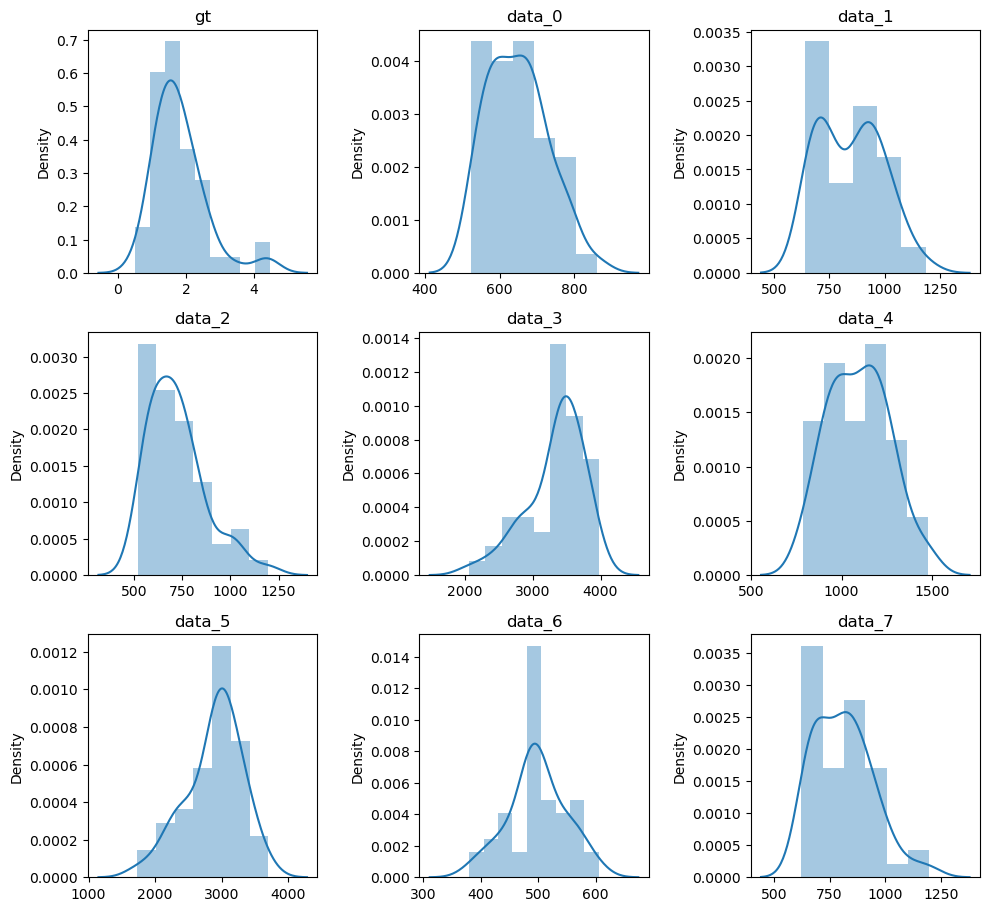

In [32]:
from classifer.classifer_base import Classifier

data = Classifier.read_data("./data/1BAN.csv")
analysis_data_distribution(data)

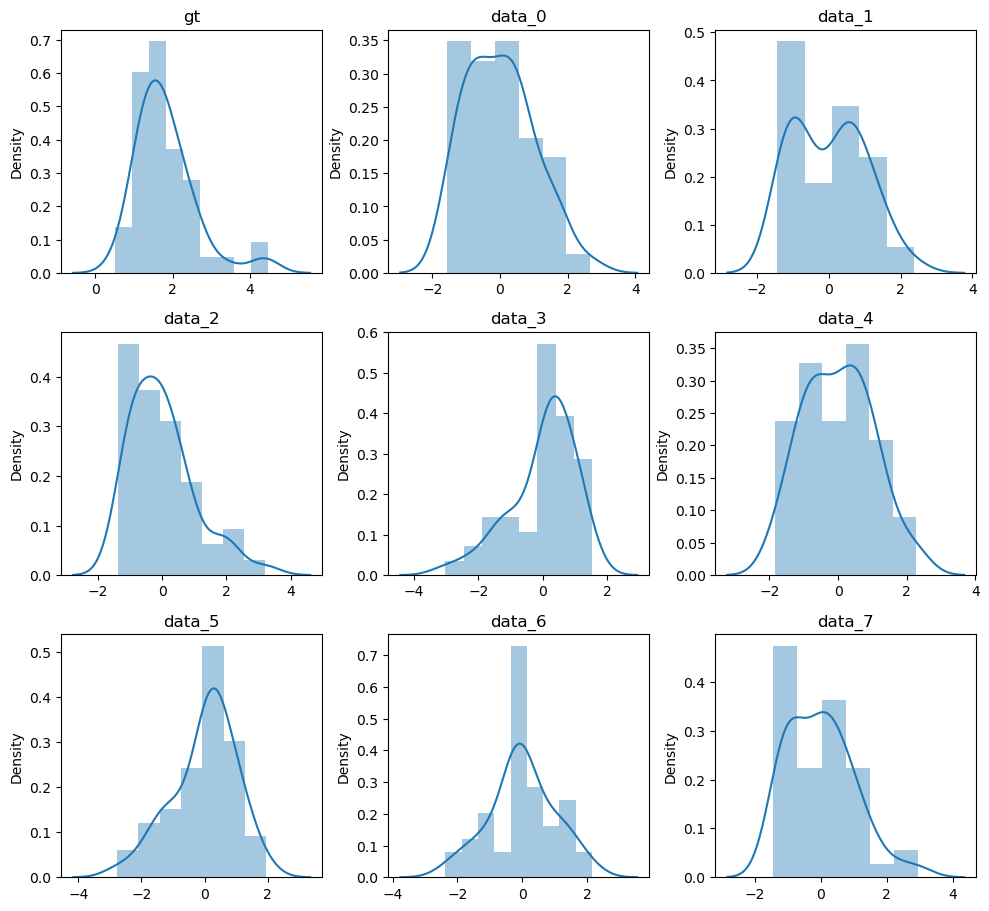

In [34]:
from sklearn.preprocessing import StandardScaler
import copy

standard_data = copy.deepcopy(data)

standarder = StandardScaler()
standard_data.x = standarder.fit_transform(standard_data.x)
analysis_data_distribution(standard_data)

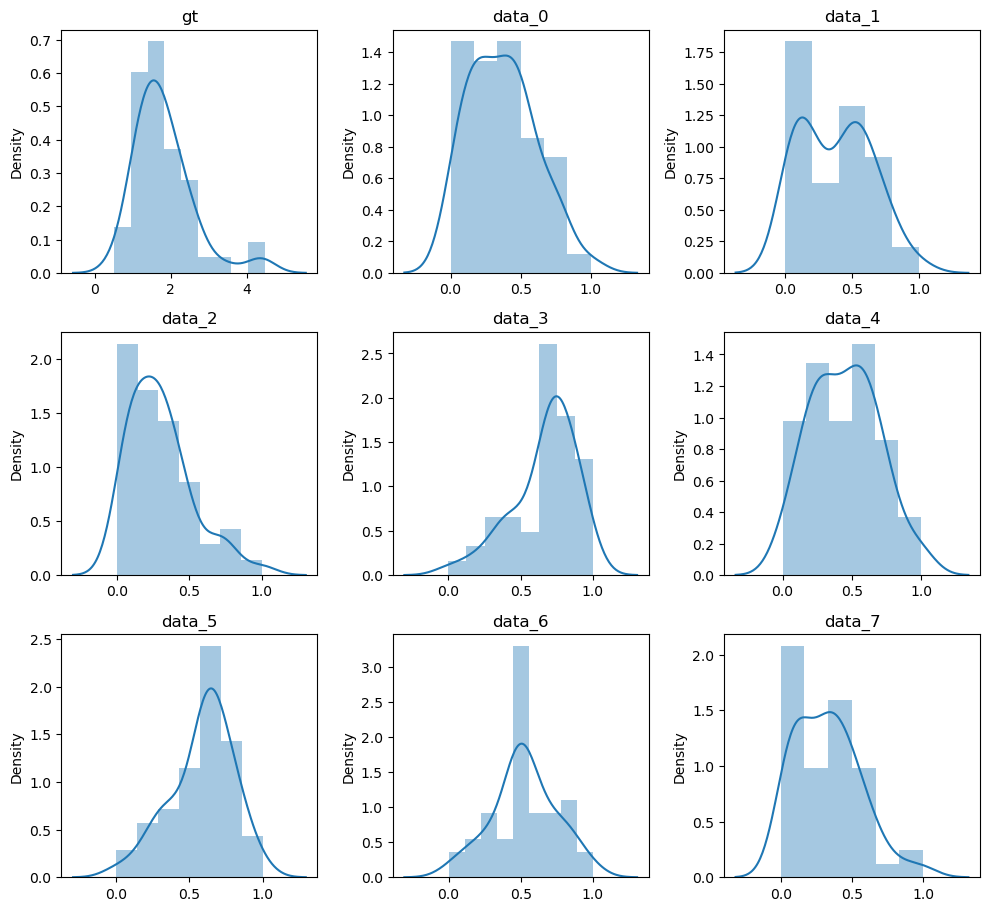

In [36]:
from sklearn.preprocessing import MinMaxScaler
import copy

minmax_data = copy.deepcopy(data)

minmax_scaler = MinMaxScaler()
minmax_data.x = minmax_scaler.fit_transform(minmax_data.x)
analysis_data_distribution(minmax_data)

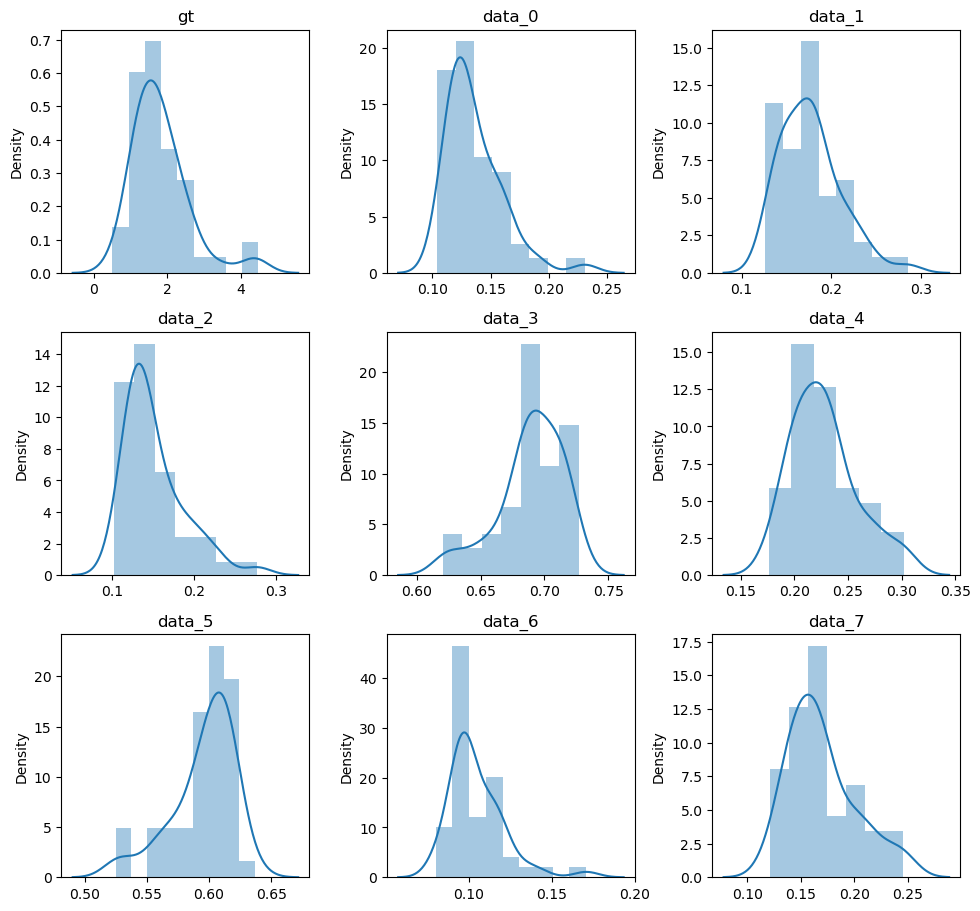

In [35]:
from sklearn.preprocessing import Normalizer
import copy

normlize_data = copy.deepcopy(data)

normalizer = Normalizer()
normlize_data.x = normalizer.fit_transform(normlize_data.x)
analysis_data_distribution(normlize_data)

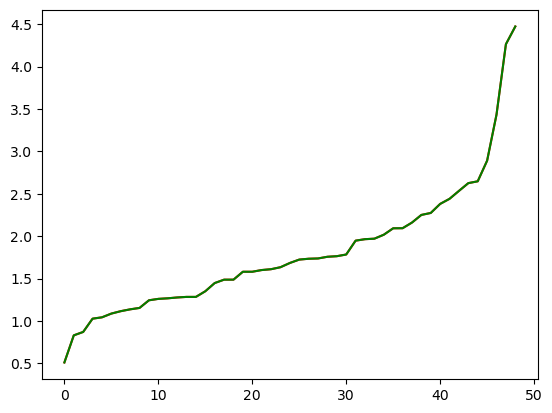

In [43]:
from classifer.classifer_base import Classifier
from matplotlib import pyplot as plt
data = Classifier.read_data("./data/1BAN.csv")


plt.plot(data.gt, color="red")

data.gt.sort()
plt.plot(data.gt, color="green")
plt.show()